In [1]:
using JuMP
using GLPK
#using Xpress
using Plots

## Q1
An appliance manufacturer produces two models of microwave ovens: H and W. Both models require fabrication and assembly work; each H uses 4 hours of fabrication and 2 hours of assembly, and each W uses 2 hours of fabrication and 6 hours of assembly. There are 600 fabrication hours available this week and 480 hours of assembly. Each H contributes £40 to profits, and each W contributes £30 to profits. How many of each of H and W should the manufacturer produce this week, in order to maximise profits?<br>
(i) Write down the problem as a linear programming problem in canonical form, indicating clearly what are the decision variables, objective function and constraints.<br>
(ii) Plot the constraints, feasible space and the optimal solution for this problem

## Solution 1
Decision Variables<br>
H: volume of microwave oven type H<br>
W: volume of microwave oven type W    

Objective Function: Max z=40H + 30W

Constraints correspond to the available fabrication and assembly hours. The LP in canonical form is as follows:

$$Maximise: \ 40H + 30W $$

<div style="text-align: center"> Subject to constraint: </div>
$$4H + 2W \leq 600$$
$$2H + 6W \leq 480$$

$$H\ge 0,W\ge 0$$

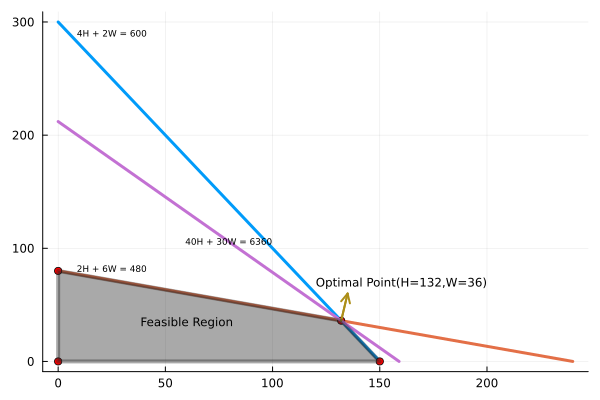

In [2]:
# Graphical Method
x1 = [0,150]; y1 = [300,0]
x2 = [0,240]; y2 = [80,0]

# Plotting constraint lines
p1 = plot(x1, y1,lw=3, annotation=[(25,290,"4H + 2W = 600",6)])
p2=plot!(p1, x2, y2,lw=3,annotation=[(25,82,"2H + 6W = 480",6)])

# Plotting points on the feasible region
p3=plot!(p2, [0,0,132,150], [0,80,36,0], seriestype = :scatter,legend = false,color="red")


# Plotting objective function with different values
# We keep increasing or decreasing the objective value till we find the optimal solution
obj_val = 6360
x3 = [0,obj_val/40]; y3 = [obj_val/30,0]
p4=plot!(p3, x3, y3,lw=3,annotation=[(obj_val/80,obj_val/60,"40H + 30W = $(obj_val)",6)])

# In practice, it is enough to figure out the two constraints whose intersection will yield the optimal solution
# Then, compute the optimal point yourself
# We now show the optimal point
p5=plot!(p4,[132,135],[36,60],lw=2,arrow=0.4,annotation=[(160,70,"Optimal Point(H=132,W=36)",8)])

# Plotting feasible region
x=[0,0,132,150,0]; y=[0,80,36,0,0]
plot!(p4,x,y,palette = cgrad(:grays),lw=4, fill = 0, α = 0.4,annotation=[(60,35,"Feasible Region",8)])

## Q2
A small sweets shop is preparing for the holiday season. The owner must decide how many bags of deluxe mix and how many bags of standard mix of Peanut/Raisin Delite to put up in order to maximise profits. The deluxe mix has 2/3 kg raisins and 1/3 kg peanuts, and
the standard mix has 1/2 kg raisins and 1/2 kg peanuts per bag. The shop has 90 kg of raisins and 60 kg of peanuts to work with.
Peanuts cost £.60 per kg and raisins cost £1.50 per kg. The deluxe mix will sell for £2.90 per kg, and the standard mix will sell for £2.55 per kg. The owner estimates that no more than 110 bags of one type can be sold.<br>
(i) Write down the problem as a linear programming problem in canonical form, indicating clearly what are the decision variables, objective function and constraints. Then, solve it using a solver.<br>
(ii)  Plot the constraints, feasible space and the optimal solution for this problem


In [42]:
model = Model(GLPK.Optimizer)
@variable(model, 0 <= deluxe <= 110)
@variable(model, 0 <= standard <= 110)
@constraint(model, (2/3) * deluxe + (1/2) * standard <= 90) # (deluxe = 0, standard = 180) (deluxe = 60, standard = 0)
@constraint(model, (1/3) * deluxe + (1/2) * standard <= 60) # (deluxe = 180, standard = 0) (deluxe = 0, standard = 120)
@objective(model, Max, 2 * deluxe + 1.5 * standard)  # = 270       # (deluxe = 0, standard = 180) (deluxe = 135, standard = 0)
optimize!(model)
println("deluxe = ", value(deluxe))
println("standard = ", value(standard))
println("max profit = £", objective_value(model))

deluxe = 110.0
standard = 33.33333333333334
max profit = £270.0
135.0


Finding axis intersections for: 2x + 1.5y = 270
x-axis intersection (y = 0):
  2 * x + 1.5 * 0 = 270
  2 * x = 270
  x = 135.0
  Point: (135.0, 0)

y-axis intersection (x = 0):
  2 * 0 + 1.5 * y = 270
  1.5 * y = 270
  y = 180.0
  Point: (0, 180.0)

SUMMARY:
Line: 2x + 1.5y = 270
x-axis intersection: (135.0, 0)
y-axis intersection: (0, 180.0)

VERIFICATION:
x-intercept check: 2 * 135.0 + 1.5 * 0 = 270.0
y-intercept check: 2 * 0 + 1.5 * 180.0 = 270.0
Both should equal 270: ✓ CORRECT


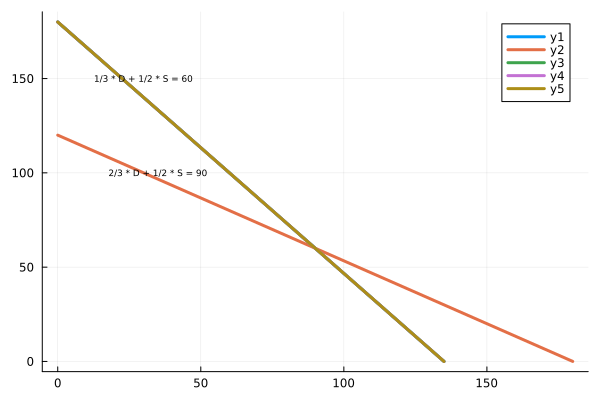

In [ ]:
# Plotting
x1 = [135, 0]; y1 = [0, 180]
x2 = [180, 0]; y2 = [0, 120]
x3 = [0, 135]; y3 = [180, 0]

feas_x = [0, 90, 120, 0]
feas_y = [0, 60, 0, 0]

#p1 = plot(x1 , y1, lw = 3, annotation=[(35, 100, "2/3 * D + 1/2 * S = 90", 6)])
#p2 = plot!(p1, x2, y2, lw = 3, annotation=[(30, 150, "1/3 * D + 1/2 * S = 60", 6)])
p3 = plot(p2, x3, y3, lw = 3, annotation=[])
p3
#p3 = plot!(p2, feas_x, feas_y, seriestype = :scatter, legend = false, color = "red")
#p4 = plot!(p3, feas_x, feas_y, palette = cgrad(:grays), lw=4, fill = 0, α = 0.4, annotation=[(60,35,"Feasible Region",8)])

## 

Q3
A retired couple supplement their income by making fruit pies, which they sell to a local grocery store. During the month of September, they produce apple and grape pies. The apple pies are sold for £1.50 to the grocer, and the grape pies are sold for £1.20. The couple is able to sell all of the pies they produce owing to their high quality. They use fresh ingredients. Flour and sugar are purchased once each month. For the month of September,
they have 1,200 cups of sugar and 2,100 cups of flour. Each apple pie requires 3/2 cups of sugar and 3 cups of flour, and each grape pie requires 2 cups of sugar and 3 cups of flour. What is the number of grape and apple pies that will maximise revenues if the couple working together can make an apple pie in six minutes and a grape pie in three minutes. They plan to work no more than 60 hours.<br>
(i) Write down the problem as a linear programming problem in canonical form, indicating clearly what are the decision variables, objective function and constraints. Solve it using a solver.<br>
(ii) Plot the constraints, feasible space and the optimal solution for this problem.<br>
(iii) Determine the amounts of sugar, flour, and time that will be unused. 

## Q4 
Write down an example of a linear programming problem (different from lecture slides) for which the set of feasible points is not empty, but which does not have an optimal solution because better and better feasible solutions can always be found. Plot the constraints and feasible space for this problem.

## Q5
A  young couple,  Eve and  Steve,  want to divide their main household chores  (cleaning, cooking, dishwashing, and laundering) between them so that each has two tasks but the total time they spend on household duties is kept to a  minimum.  Their  efficiencies  on these  tasks  differ,  where  the  time  each  would  need  to  perform  the  task  is  given  by  the following table:<br>

 
  Task   |Cleaning |Cooking |Dishwashing|Laundry
---|---|---|---|---
Eve  |    4.5  |  7.8   |    3.6   |   2.9
Steve  |    4.9  |  7.2   |    4.3   |   3.1


Formulate a binary integer program for this problem, indicating decision variables (and their interpretation),   objective function   (minimized or maximized?), and constraints. Ignoring the integrality constraints, solve the resulting linear program